In [67]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

# Domando Equações Não Lineares: Inspeção e Descobrimento de Raízes

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Identificar os tipos de não linearidades presentes em problemas de engenharia computacional.</li>
	    <li>Utilizar análise gráfica e inspeção de parâmetros físicos para estimar palpites para raízes de equações não lineares.</li>
	    <li>Implementar e testar algoritmos para processos iterativos usando condicionais e fluxo de controle.</li>	    
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> "O coração sente que há três dimensões no espaço e que os números são infinitos; e a razão demonstra, em seguida, que não existem dois números quadrados dos quais um seja o dobro do outro. Os princípios são sentidos, as proposições são concluídas; e tudo isso com certeza, embora por caminhos diferentes." (Blaise Pascal, <em>Pensées</em>, 1670) 
        </p></em>
    </div>        
</div>

Resolver equações não lineares pela determinação de suas raízes é um dos problemas centrais em ciências computacionais e engenherias. Em termos simples, trata-se de encontrar os valores de uma variável que tornam verdadeira uma equação do tipo $f(x) = 0$, onde $f$ define uma não linear em $x$. Diferente das equações lineares, cuja resolução segue regras algébricas diretas, as equações não lineares frequentemente não admitem soluções analíticas fechadas. Elas podem ter uma ou várias raízes, ou até mesmo nenhuma, dependendo do comportamento da função.

O interesse em resolver esse tipo de problema está presente em diversas áreas práticas, como a engenharia estrutural (quando se busca o ponto de equilíbrio de uma viga deformada), na termodinâmica (para encontrar a temperatura de equilíbrio), ou em algoritmos de inteligência artificial (ao ajustar parâmetros de redes neurais). Neste capítulo, relembraremos as principais funções descritoras de não linearidades e estudaremos recursos para análise gráfica de funções não lineares como precursores do conceito de _aproximações sucessivas_ e de dois métodos clássicos para este fim: bisseção e Newton-Raphson. 

Uma vez que cada método apresenta vantagens e limitações, que dependem da regularidade da função, do número de raízes esperadas, da proximidade de um chute inicial e da sensibilidade a erros de arredondamento, antes de aplicá-los, é essencial compreender o comportamento qualitativo da função por meio de abordagens iterativas, visuais e numéricas. Em particular, focaremos nos seguintes tópicos: 

- não linearidades;
- plotagem básica de funções matemáticas com `matplotlib`;
- condicionais e fluxo de controle aplicados a processos iterativos;
- critérios de decisão;


```{figure} ../figs/ga-ai.png
---
width: 250px
name: fig-gaai
---
```

## Não linearidades

Comportamentos não lineares estão na base de diversos fenômenos naturais e modelos físicos. Por exemplo, a resposta de um material a uma força intensa pode caracterizar uma relação não linear entre tensão e deformação. Em sistemas dinâmicos, o crescimento populacional pode ser modelado por uma função exponencial ou logística, ambas não lineares. O movimento do sangue pelas veias e artérias segue leis não lineares. É ousado, mas não descabido dizer que tudo (ou quase tudo) à nossa volta apresenta algum tipo de comportamento não linear.

As funções matemáticas não lineares mais comuns incluem exponenciais, logarítmicas, polinômios de grau maior que 1, trigonométricas, racionais (frações de polinômios), e funções compostas envolvendo essas categorias. Por exemplo, o comportamento de crescimento populacional pode ser descrito por uma função exponencial, enquanto o amortecimento de um sistema pode envolver uma função logarítmica. Equações envolvendo seno ou cosseno aparecem frequentemente na análise de vibrações ou circuitos elétricos. Cada uma dessas funções apresenta comportamentos locais complexos, como máximos e mínimos, inflexões e assimetrias, que não podem ser previstos apenas por inspeção direta da expressão algébrica.

Podemos separar equações não lineares unidimensionais da forma $f(x) = 0$ em dois grupos básicos:

- _Equações polinomiais_, em que $f$ é um polinômio.

- _Equações transcendentais_, em que $f$ possui pelo menos uma função transcendental, i.e. que não pode ser escrita de forma algébrica (variáveis não podem ser postas em evidência).


### Equações polinomiais

Algumas formas univariadas de equações polinomiais são as seguintes:

- Canônica: $f(x) = a_nx^n + a_{n-1}x^{n-1} + \dots + a_1x + a_0 = \displaystyle\sum_{k=0}^n a_kx^k$

- Fatorada: $f(x) = a_n(x - x_1)(x - x_2) \ldots (x - x_n) = a_n \displaystyle\prod_{k=1}^n (x-x_k)$

- Racional: $f(x) = a_nx^{\frac{p_n}{q_n}} + a_{n-1} x^{ \frac{p_{n-1}} {q_{n-1}} } + \ldots + a_1 x^{\frac{p_1}{q_1}} + a_0 = \displaystyle\sum_{k=0}^n a_k x^{\frac{p_k}{q_k}}, \ \ \frac{p_k}{q_k} \in \mathbb{Q}$ 

Exemplos são: $x^3 - 2x + 1/2 = 0$; $(x+1)^5 - 40x = 0$; e $3x^{4/3} - 0.32x^{1/2} - x + 2 = 0$.


### Equações transcendentais

Equações transcendentais são oriundas da combinação de uma ou mais das seguintes funções:

- Logaritmo: $\log$, $\log_2$, $\ln$

- Exponencial: $\exp$

- Trigonométricas: $\text{sen}$, $\text{cos}$, $\text{tan}$ etc.

- Trigonométricas inversas: $\text{asec},\text{acos}, \cosh$ etc.

Exemplos são: $\log(x) - \cos(x) + \pi = 0$; $\text{sen}(3x) + \tanh(0.5x) - 1 = 0$; e $\sqrt{x} - \frac{3}{5}\exp(x) = 0$.




## Análise gráfica

Devido à complexidade das funções não lineares, a análise gráfica tornou-se uma ferramenta fundamental para compreender e investigar o comportamento delas. Visualizar o gráfico de uma função permite identificar regiões onde há cruzamento com o eixo das abscissas (ou seja, onde a função é igual a zero), bem como analisar a concavidade, a existência de múltiplas raízes e a sensibilidade a perturbações nos parâmetros. Essa intuição visual é essencial antes da aplicação de métodos numéricos. Faremos um ensaio básico de análise gráfica da função do salto do paraquedista já vista no {numref}`Caderno %s <cap:modelagem>`, isto é: 

$$v = \dfrac{gm}{c}(1 - e^{-(c/m)t}).$$

Entretanto, vale tecer breves comentários sobre variáveis e parâmetros para fins de redução de dimensionalidade na análise.

### Variáveis e parâmetros

Como já dissemos, tratamos aqui da determinação de raízes de equações não-lineares em uma dimensão (1D). Isto significa que apenas uma variável é usada como dependente, embora a variável dependente possa depender de outras quantidades para ser computada. No caso da função $v$ acima, o tempo $t$ está sendo tomado como a única variável independente, ao passo que a aceleração da gravidade $g$, a massa $m$ e o coeficiente de arrasto $c$ tornam-se _parâmetros_. 

Aplicando-se uma notação matemática estendida, poderíamos escrever 

$$v = f({\color{red}t};{\color{green}g},{\color{green}m},{\color{green}c}),$$

onde destacamos a variável independente em vermelho e os parâmetros em azul, após o ponto-e-vírgula. Entretanto, qualquer um dos parâmetros poderia ser analisado sob o ponto de vista de variável, assumindo-se as outras quantidades como parâmetros. Para este mesmo exemplo, se quiséssemos estudar a dependência de $v$ por variação de$g$, teríamos de manter $m$, $c$ e $t$ _fixados_, obtendo uma forma tal que

$$v = f({\color{red}g};{\color{green}m},{\color{green}c},{\color{green}t}).$$

Se o mesmo raciocínio for utilizado para$c$, a forma 

$$v = f({\color{red}c};{\color{green}t},{\color{green}g},{\color{green}m})$$

indicaria que$c$é a variável independente, enquanto $t$, $g$ e $m$ seriam parâmetros com um valor fixado e conhecido.

Assim, por indução, a busca por raízes de equações não-lineares que dependam de $n$ variáveis em apenas uma dimensão deve considerar _uma variável independente com valor mutável_ e $n-1$ _parâmetros com valores fixados_. Usando o Cálculo a várias variáveis, se 

$$
f: \mathbb{R}^n \to \mathbb{R} \\
(x_1,x_2,\ldots,x_n) \mapsto y
$$

é a função não-linear a ser estudada, a forma

$$y = f({\color{red}x_k}; {\color{green}x_1},{\color{green}x_2},\ldots,{\color{green}x_{k-1}},{\color{green}x_{k+1}},\ldots,{\color{green}x_{n-1}},{\color{green}x_n})$$

significaria que a análise é _unidimensional_ sobre a variável $x_k$ nos parâmetros de $x_1$ a $x_n$, excluindo-se $x_k$.

Para o nosso exemplo, $n=4$, $y = v$, a variável independente $x_k$ é o coeficiente de arrasto $c$ – note que $k$ pode ser qualquer valor entre 1 e 4 –, $f$ é a expressão matemática $\dfrac{gm}{c}(1 - e^{-(c/m)t})$ e os demais símbolos $x_j$, para $j \neq k$, são os parâmetros.

A visualização de "cortes" paralelos aos eixos coordenados que resultam da fixação de uma variável (tornando-se parâmetro) e da liberação de outra para um caso em que $f$ é bivariada está disponível abaixo. Ao interagir com a representação visual somos capazes de reconhecer que $f(x_1,x_2)$ recai em uma função univariada se a variável $x_1$ ou $x_2$ for fixada – de modo exclusivo – , assim podendo ser estudada pelas ferramentas aprendidas neste curso.

In [68]:
from plotly.offline import plot
from IPython.display import display, HTML
import plotly.graph_objects as go
import numpy as np

# Define the function f(x, y) (you can replace this with your own function)
def f(x, y):
    return np.sin(x) + np.cos(y)

# Generate data for the function surface plot
x_values = np.linspace(-2, 0, 100)
y_values = np.linspace(0, 5, 100)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)
z_values = f(x_mesh, y_mesh)

# Create a surface plot for the function
fig = go.Figure(data=[go.Surface(z=z_values)])

fig.update_traces(showscale=False,
                  hoverinfo='skip',
                  colorscale='Viridis',opacity=0.6)

# Update layout for better presentation
fig.update_layout(    
    template='simple_white',
    title='Análise gráfica (3D)',
    width=600,
    height=400,
    margin=dict(l=40, r=40, b=40, t=40),
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='y',
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=False,
            gridcolor='#bdbdbd',
            gridwidth=2,
            zerolinecolor='#969696',
            zerolinewidth=4,
            linecolor='#636363',
            linewidth=6,
            nticks=3,
            tickmode='linear',
            tick0=x_values[0],
            dtick=51),
        yaxis=dict(
            nticks=3,
            tickmode='linear',
            tick0=y_values[0],
            dtick=51)
        
    )
);

In [69]:
plot(fig, show_link=False,filename='../figs/analise-grafica.html')
display(HTML('../figs/analise-grafica.html'))

### Análise gráfica do coeficiente de arrasto

Aplicaremos a redução de dimensionalidade proposta anteriormente fixando como parâmetros o tempo $t$, a velocidade $v$, a massa $m$ e a aceleração da gravidade $g$, e permitindo a livre variação do coeficiente de arrasto $c$. A análise gráfica servirá para visualizar o comportamento desta variável e detectar, pelo menos aproximadamente, onde há possíveis raízes. Este processo é conhecido como _localização_. 

```{admonition} Dica
:class: tip, dropdown
A plotagem básica de funções matemáticas via _matplotlib_ pode ser realizada pela simples chamada de `plt.plot(x,y)`, quando `plt` é o _placeholder_ da biblioteca `pyplot`. As variáveis de código `x` e `y` funcionam como domínio e contradomínio.
```

Vejamos como realizar a plotagem da função $y = f(c; t,v,m,g)$. Observe que, sendo $c$ a única variável e, além disso, a variável independente, podemos, sem prejuízo, escrever $y = f(c)$, ressalvada a fixação dos demais parâmetros. Neste caso, a imagem desta função, $y$, não necessariamente possui um sentido físico e não temos que nos preocupar em interpretar o que ela significa. O importante é identificar se há um ou mais valores de$c$que produzem uma imagem nula. Em caso positivo, teremos encontrado uma ou mais raízes de $f$.

Em outras palavras, as perguntas que queremos responder são: 

- Existe algum coeficiente de arrasto que produz o cenário determinado pelos parâmetros? 
- Se houver, o cenário que se forma é realista? Ele respeita as leis da física?

Vamos fazer experimentos numéricos e começar com alguns valores iniciais para os parâmetros.

In [70]:
import numpy as np
import matplotlib.pyplot as plt 

# Parâmetros fixados 
t = 120.0
v = 80.0
m = 90.0
g = 10.

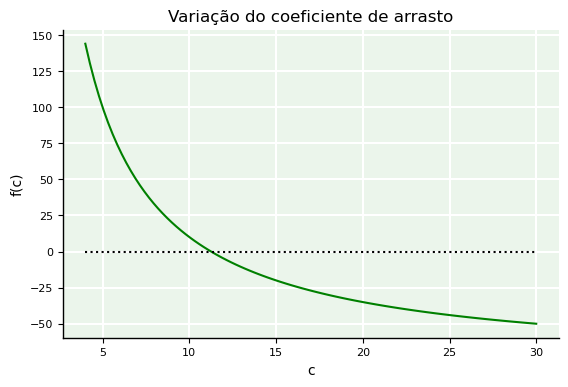

In [71]:
# Localização
a,b = 4,30
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v # f(c) = 0

plt.plot(c,f,'g-',c,c*0,'k:');
plt.xlabel('c');
plt.ylabel('f(c)');
plt.title('Variação do coeficiente de arrasto');

### Refinamento

Observa-se que existe uma raiz para $f(c)$ próxima a $c = 11$. Todavia, é difícil precisar seu valor apenas por observação visual. A fim de buscar melhores aproximações, podemos refinar o gráfico realizando uma espécie de _zoom_ até obter um intervalo adequado para aplicação algorítmica.

Nos gráficos abaixo, produzimos uma espécie de refinamento apenas através de plotagens. Até aí, não há nada numérico acontecendo. Porém, isso nos ajuda a selecionar ainda melhor uma condição inicial para o processo iterativo subsequente.

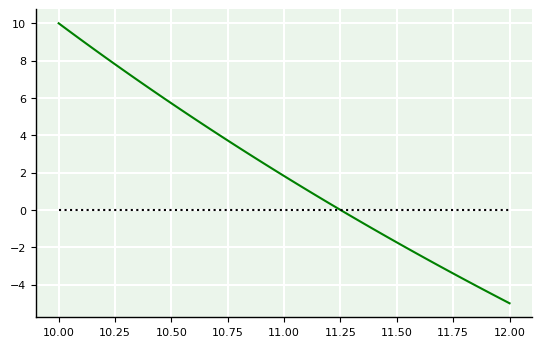

In [72]:
# Refinamento
a,b = 10,12
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-');
plt.plot(c,0*c,'k:');

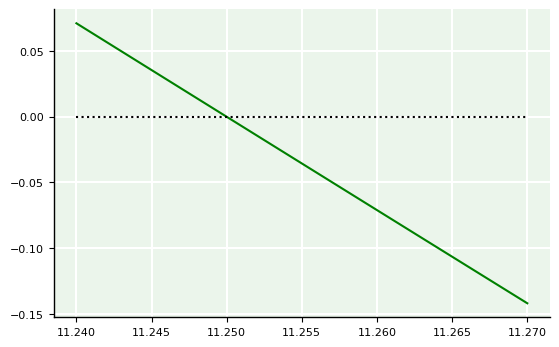

In [73]:
# Refinamento
a,b = 11.24,11.27
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-')
plt.plot(c,0*c,'k:');

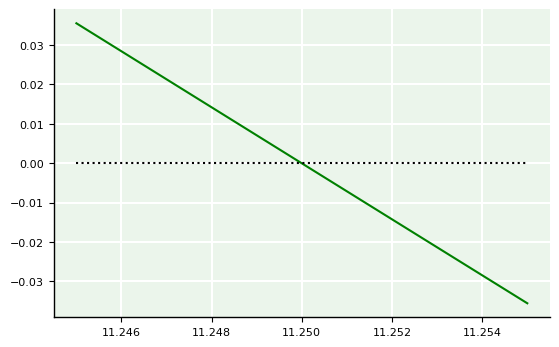

In [74]:
# Refinamento
a,b = 11.245,11.255
c = np.linspace(a,b,100)
f = g*m/c*(1 - np.exp(-c/m*t)) - v

plt.plot(c,f,'g-');
plt.plot(c,0*c,'k:');

Apenas com esses refinamentos, já é possível determinar a raiz única com um erro absoluto de 0.01 unidades, visto que ela está entre 11.245 e 11.255. Além disso, note como, neste intervalo, a curvatura da função não é mais identificável. Isso mostra que, nesse intervalo, $f$ é praticamente "linear". Porém, nos casos reais, geralmente requeremos precisão mais elevada. Então, para melhorarmos a precisão de nossa raiz, precisamos avançar para uma segunda etapa que apoia-se em processos iterativos para criar o que é conhecido como _aproximações sucessivas_.

### Receitas prontas para visuais

Na análise gráfica de funções não lineares, alguns elementos úteis para as plotagens são:

- o gráfico da função $f(x)$ sob análise;
- o gráfico da função $g(x) = 0$ ou o gradeado do plano Cartesiano;
- as legendas dos eixos;
- o intervalo de estimativas iniciais;

Um bloco de código baseado em `matplotlib` replicável que contempla tudo isso é fornecido a seguir:

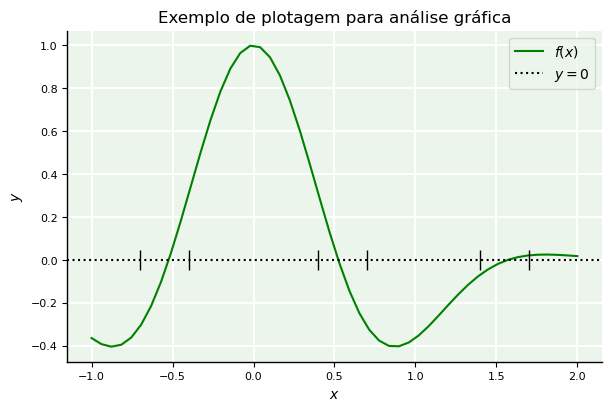

In [75]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,2) # domínio de análise
f = np.exp(-x**2)*np.cos(3*x) # função-alvo

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True) # figura
#ax.grid(axis='both') # gradeado
ax.plot(x,f,'g',label='$f(x)$') # plotagem
ax.axhline(y=0, ls=':', color='k', label='$y=0$') # g(x) = 0
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Exemplo de plotagem para análise gráfica')

# 1o. intervalo de busca
ax.plot(-0.7,0,'|',c='k',ms=15)
ax.plot(-0.4,0,'|',c='k',ms=15)

# 2o. intervalo de busca
ax.plot(0.4,0,'|',c='k',ms=15)
ax.plot(0.7,0,'|',c='k',ms=15)

# 3o. intervalo de busca
ax.plot(1.4,0,'|',c='k',ms=15)
ax.plot(1.7,0,'|',c='k',ms=15)

ax.legend();


#### Sistemas métricos e homogeneidade dimensional

Ao lidarmos com o problema anterior, não foi necessário saber como as grandezas envolvidas são quantificadas e quais são as suas unidades em algum sistema métrico. Entretanto, cabe ressaltar que problemas realistas da ciência e engenharia computacional devem estar associados a um sistema métrico consistente e as equações envolvidas devem ser dimensionalmente homogêneas, ou seja, corretas e fisicamente válidas. 

De acordo com o Sistema Internacional (SI) [[NIST]](https://www.nist.gov/pml/weights-and-measures/si-units), há 7 de unidades básicas, estabelecidas pela mensuração de 7 quantidades básicas ({numref}`Tabela %s <tbl-si>`).

```{table} Unidades e Quantidades Básicas do SI
:name: tbl-si
| Quantidade          | Unidade SI         | Símbolo da Unidade |
|:--------------------|:-------------------|:-------------------|
| Comprimento         | metro              |$m$                 |
| Massa               | quilograma         |$kg$                |
| Tempo               | segundo            |$s$                 |
| Corrente elétrica   | ampere             |$A$                 |
| Temperatura termodinâmica | kelvin       |$K$                 |
| Quantidade de substância | mol           |$mol$               |
| Intensidade luminosa| candela            |$cd$                |
```
A descrição das unidades básicas é a seguinte:

- **Metro** ($m$): Unidade de comprimento. O metro é definido pela distância que a luz percorre no vácuo em um intervalo de tempo de 1/299.792.458 de segundo.
- **Quilograma** ($kg$): Unidade de massa. O quilograma é definido em termos da constante de Planck.
- **Segundo** ($s$): Unidade de tempo. O segundo é definido pela duração de 9.192.631.770 períodos da radiação correspondente à transição entre dois níveis hiperfinos do estado fundamental do átomo de césio-133.
- **Ampere** ($A$): Unidade de corrente elétrica. O ampere é definido pela força eletromagnética entre dois condutores paralelos infinitamente longos e de seção transversal desprezível.
- **Kelvin** ($K$): Unidade de temperatura termodinâmica. O kelvin é definido em termos da energia térmica absoluta (temperatura) e da constante de Boltzmann.
- **Mol** ($mol$): Unidade de quantidade de substância. O mol é definido pelo número de átomos em 12 gramas de carbono-12, o que corresponde ao número de Avogadro.
- **Candela** ($cd$): Unidade de intensidade luminosa. A candela é definida pela intensidade luminosa em uma direção específica de uma fonte que emite radiação monocromática de frequência $540 \times 10^{12}$ Hz e tem uma intensidade radiante nessa direção de 1/683 watt por esterradiano.

As unidades básicas relacionam-se com unidades derivadas por meio de multiplicação e divisão, assim produzindo o grande conjunto de quantidades que usamos para quantificar os fenômenos de nosso universo ({numref}`fig-si`).

```{figure} ../figs/si.png
---
width: 400px
name: fig-si
---
Diagrama de unidades básicas e derivadas do SI. Fonte: [[NIST]](https://www.nist.gov/pml/weights-and-measures/si-units).
```

##### Princípio da Homogeneidade Dimensional

Para que uma equação física seja dimensionalmente homogênea, todas as suas partes devem ter as mesmas dimensões. Isso implica que, ao realizar operações matemáticas como adição, subtração, multiplicação ou divisão, as dimensões resultantes devem ser coerentes. Aplicando as unidades do SI à análise de nossa equação original, verificamos que a equação da velocidade terminal é dimensionalmente homogênea, pois cada termo da equação possui a dimensão de velocidade$[L/T]$, confirmando a consistência e validade da fórmula ({numref}`Tabela %s <tbl-ad>`; {numref}`Tabela %s <tbl-ad2>`).


```{table} Análise dimensional da equação da velocidade terminal do paraquedista
:name: tbl-ad

| Variável/Símbolo      | Descrição                         | Dimensão      | Unidade     |
|:----------------------|:----------------------------------|:--------------|:-----------:|
|$g$              | Aceleração devido à gravidade     |$[LT^{-2}]$| $m/s^2$        |
|$m$              | Massa do paraquedista             |$[M]$      | $kg$          |
|$c$              | Coeficiente de arrasto            |$[M/T]$    | $kg/s$        |
|$t$              | Tempo                             |$[T]$      | $s$           |
|$v$           | Velocidade em função do tempo     |$[L/T]$    | $m/s$         |
|$\frac{gm}{c}$   | Termo de velocidade               |$[L/T]$    | $m/s$         |
|$\exp\left(-\frac{c}{m}t\right)$| Termo exponencial | Adimensional  | N/A         |
```

```{table} Verificação dimensional da equação completa
:name: tbl-ad2

| Termo da Equação                              | Dimensão Resultante |
|:----------------------------------------------|:-------------------:|
|$\frac{gm}{c}$                           |$[L/T]$          |
|$\exp\left(-\frac{c}{m}t\right)$         | Adimensional        |
|$1 - \exp\left(-\frac{c}{m}t\right)$     | Adimensional        |
|$v(t) = \frac{gm}{c} \left(1 - \exp\left(-\frac{c}{m}t\right)\right)$|$[L/T]$|
```

Dispondo da análise dimensional, podemos desenvolver programas de computador para finalidades de simulação, por exemplo, com muito mais confiabilidade e poder de verificação, visto que saberemos dizer quando uma situação romperá uma lei física. 

## Processo iterativo

Como as soluções analíticas são raras em problemas não lineares mais realistas, recorre-se frequentemente a processos iterativos que convergem progressivamente para uma solução aceitável. Essas aproximações baseiam-se em hipóteses locais, como a linearização em torno de um ponto, e dependem criticamente da escolha de bons palpites iniciais e de critérios de parada adequados. Processos iterativos em métodos numéricos assumem o caráter de _aproximações sucessivas_, pelo fato de buscarem aproximações melhores para uma quantidade a partir de uma estimativa inicial predefinida. 

Levando em conta que estamos trabalhando com funções em uma dimensão, um processo iterativo a uma variável pode ser descrito por:

$$x^{({k})} = \phi(x^{(k-1)}), \ \ k = 1, \ldots, n < \infty$$
$$x^{(0)} = x_0,$$

Acima, $\phi$ é a _função de iteração_, ao passo que $x_0$ é a _estimativa inicial_ (_initial guess_). Nesta notação, $x^{(k)}$ é a $k$-ésima _iterada_ de uma _sequência numérica discreta_.

### Fluxo de controle

A primeira estrutura de controle fundamental para computação numérica de processos iterativos é o laço `for`. Vamos ver como usá-lo para computar algumas funções iterativas, inclusive plotar os resultados.

- $\phi_1 = \dfrac{ (x^{(k-1)})^{1/2}}{\pi} - x^{(k-1)}, \ \  x^{(0)} = 1, \ \ k < N$

x(0) = 1
x(1) = -0.8408
x(2) = 0.7070
x(3) = -0.5945
x(4) = 0.4999
x(5) = -0.4203
x(6) = 0.3534
x(7) = -0.2972
x(8) = 0.2499
x(9) = -0.2101
x(10) = 0.1767
x(11) = -0.1486
x(12) = 0.1249
x(13) = -0.1050
x(14) = 0.0883
x(15) = -0.0743
x(16) = 0.0624
x(17) = -0.0525
x(18) = 0.0441
x(19) = -0.0371
x(20) = 0.0312
x(21) = -0.0262
x(22) = 0.0221
x(23) = -0.0186
x(24) = 0.0156
x(25) = -0.0131
x(26) = 0.0110
x(27) = -0.0093
x(28) = 0.0078
x(29) = -0.0066
x(30) = 0.0055
x(31) = -0.0046
x(32) = 0.0039
x(33) = -0.0033
x(34) = 0.0028


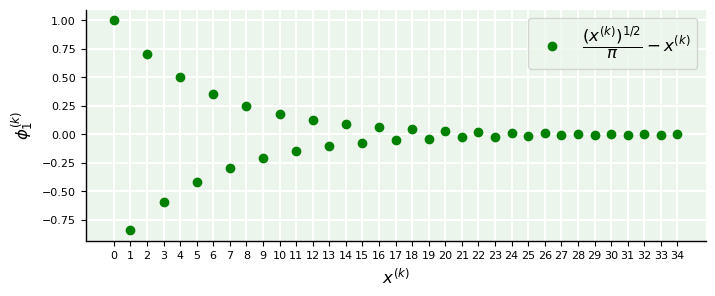

In [76]:
# No. de elementos
N = 35

# Valor inicial
x = [1]
print(f'x(0) = {x[0]}')

# Função de iteração
for k in range(1,N):
    phi = x[k-1]**1/2/np.pi - x[k-1]
    x.append(phi)
    print(f'x({k}) = {phi:.4f}')

# Plotagem
plt.figure(figsize=(8,3))
plt.plot(x,'go',label=r'$\dfrac{ (x^{(k)})^{1/2}}{\pi} - x^{(k)}$')
plt.xticks(range(N))
plt.xlabel('$x^{(k)}$',fontsize=12)
plt.ylabel(r'$\phi_1^{(k)}$',fontsize=12)
plt.legend(loc='upper right', fontsize=12);

- $\phi_2 = \dfrac{k}{x^{(k-1)}}, \ \  x^{(0)} = 1/5, \ \ k < 10$

y(0) = 0.2
y(1) = 5.0000
y(2) = 0.4000
y(3) = 7.5000
y(4) = 0.5333
y(5) = 9.3750
y(6) = 0.6400
y(7) = 10.9375
y(8) = 0.7314
y(9) = 12.3047
y(10) = 0.8127
y(11) = 13.5352
y(12) = 0.8866
y(13) = 14.6631
y(14) = 0.9548
y(15) = 15.7104
y(16) = 1.0184
y(17) = 16.6924
y(18) = 1.0783
y(19) = 17.6197
y(20) = 1.1351
y(21) = 18.5007
y(22) = 1.1891
y(23) = 19.3416
y(24) = 1.2408
y(25) = 20.1475
y(26) = 1.2905
y(27) = 20.9224
y(28) = 1.3383
y(29) = 21.6697


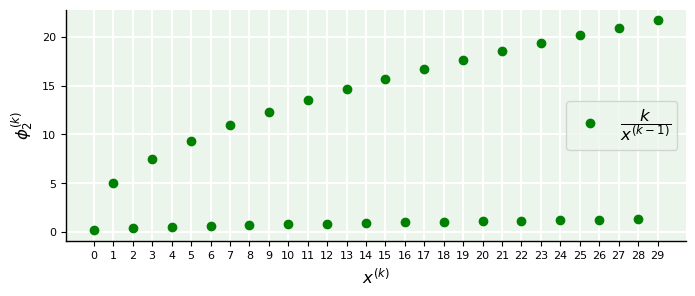

In [77]:
# No. de elementos
N = 30

# Função de iteração
y = [1/5]
print(f'y(0) = {y[0]}')
for k in range(1,N):
    phi = k/(y[k-1])
    y.append(phi)
    print(f'y({k}) = {phi:.4f}')

# Plotagem
plt.figure(figsize=(8,3))
plt.plot(y,'go',label=r'$\dfrac{k}{x^{(k-1)}}$')
plt.xticks(range(N))
plt.xlabel('$x^{(k)}$',fontsize=12)
plt.ylabel(r'$\phi_2^{(k)}$',fontsize=12)
plt.legend(loc='center right', fontsize=12);

## Aplicações

### Determinação de raízes por força bruta

No computador, sabemos que uma função matemática $f(x)$ pode ser representada de duas formas principais:

- através de uma função programada (em Python, por exemplo) que retorna o valor da função para um dado argumento 
- uma coleção de pontos $(x,f(x))$ na forma de uma tabela.

A segunda forma é bem mais útil para análise gráfica. Esta forma é também adequada para resolver problemas de determinação de raízes e de otimização com simplicidade. No primeiro caso, basta pesquisar todos os pontos e procurar onde a função cruza o eixo $x$, como fizemos anteriormente. No segundo caso, buscamos um ponto de mínimo ou máximo local, ou global.

Abordagens que seguem esse caminho podem chegar a examinar uma grande quantidade de pontos. Por essa razão, são chamados de métodos de _força bruta_, isto é, não seguem uma técnica elaborada.

#### Algoritmo numérico

Em geral, queremos resolver o problema $f(x) = 0$ especialmente quando $f$ é não-linear. Para isso, desejamos encontrar os $x$ onde $f$ cruza o eixo. Um algoritmo em força bruta deverá percorrer todos os pontos sobre a curva e verificar se um ponto está abaixo do eixo e seu sucessor imediato está acima, ou vice-versa. Se isto ocorrer, então deve haver uma raiz neste intervalo. 

**Algoritmo.** Dado um conjunto de $n+1$ pontos $(x_i,y_i)$, $y_i = f(x_i), \, i = 0,\ldots,n$, onde $x_0 < \ldots < x_n$. Verificamos se $y_i < 0$ e se $y_{i+1} > 0$. Uma expressão compacta para esta checagem é o teste $y_i \, y_{i+1} < 0$. Se o produto for negativo, então a raiz de $f$ está no intervalo $[x_i,x_{i+1}]$. Assumindo uma variação linear entre os pontos, temos a aproximação

$$f(x) \approx \dfrac{ y_{i+1} - y_i }{ x_{i+1} - x_i }(x - x_i) + y_i.$$

Logo, $f(x) = 0$ implica que a raiz é 

$$x = x_i - \dfrac{ x_{i+1} - x_i }{ y_{i+1} - y_i }y_i.$$

**Exemplo.** Encontre a raiz da função $f(x) = \exp(-x^2)\cos(3x)$ usando o algoritmo de força bruta.

Vamos plotar esta função apenas para visualizar seu comportamento.

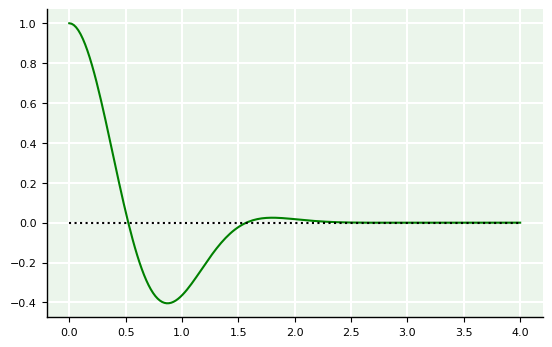

In [78]:
from numpy import exp, cos

f = lambda x: exp(-x**2)*cos(3*x)
x = np.linspace(0,4,200)
plt.plot(x,f(x),'g');
plt.plot(x,0*f(x),'k:');

Nesta plotagem, vemos claramente que a função possui duas raizes: uma próxima de $x = 0.5$ e outra em $x = \pi/6$. 

Implementemos o algoritmo.

In [79]:
def forca_bruta(f,a,b,n):
    from numpy import linspace
    x = linspace(a,b,n)
    y = f(x)
    raizes = []
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            raiz = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            raizes.append(raiz)
    if len(raizes) == 0:               
        print('Nenhuma raiz foi encontrada')
    return raizes

Agora aplicamos o algoritmo na mesma função.

In [80]:
a,b,n = 0,4,1000
raizes = forca_bruta(f,a,b,n)
print(raizes)

[np.float64(0.5236017411236913), np.float64(1.5708070694852787), np.float64(2.6180048381439596), np.float64(3.665219264613299)]


Temos, na verdade, 4 raízes! Plotemos o gráfico ampliado no intervalo [2.5,3.8].

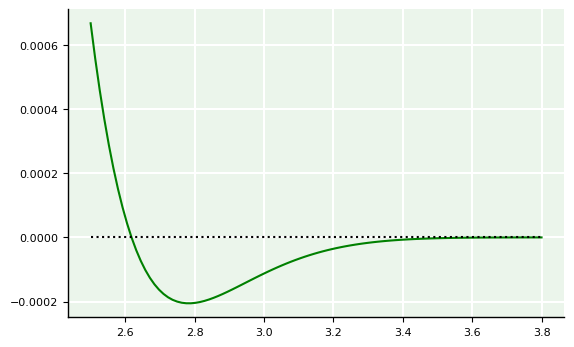

In [81]:
x2 = np.linspace(2.5,3.8,100)
plt.plot(x2,f(x2),'g',x2,0*f(x2),'k:');

Conseguimos enxergar mais uma raiz. Agora, plotemos um pouco mais ampliado entre [3.6,3.7].

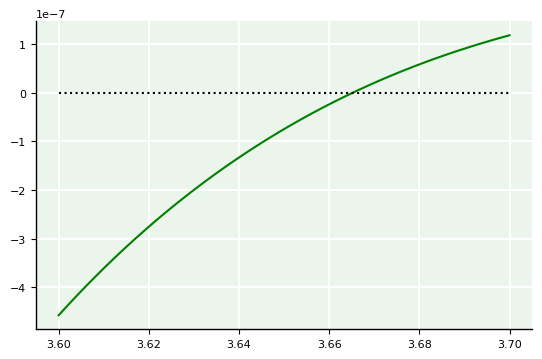

In [82]:
x3 = np.linspace(3.6,3.7,100)
plt.plot(x3,f(x3),'g',x3,0*f(x3),'k:');

Dessa forma, podemos identificar que, de fato existe uma quarta raiz.

Este exemplo mostrou uma aplicação do método de força bruta para determinação de raízes. Para finalizar, podemos embelezar o gráfico.

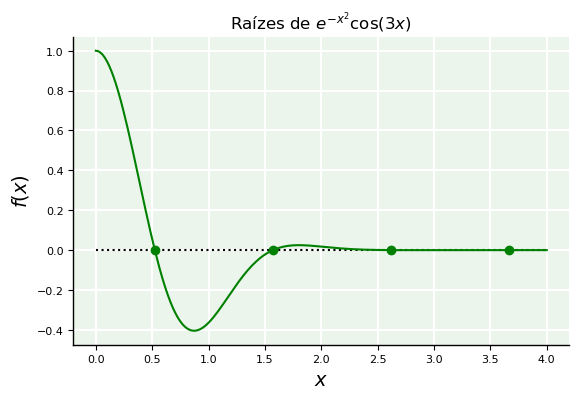

In [83]:
r = np.array(raizes) # vetoriza a lista
plt.plot(x,0*f(x),'k:',x,f(x),'g-',r,np.zeros(4),'og',)
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$f(x)$',fontsize=14)        
plt.title(r'Raízes de $e^{-x^2}\cos(3x)$');

### Programa simulador de saltos

A seguinte classe é um protótipo de código com maior carga de abstração para simulações genéricas do modelo de velocidade terminal do paraquedista. O propósito é criar plotagens diretas do comportamento de uma variável a partir de parâmetros pré-fixados pelo usuário. Por sua vez, ele pode também ser caracterizado como um _modelo computacional_ para estudo e análise do problema do salto.

In [84]:
import numpy as np, matplotlib.pyplot as plt

class Parachute:
    '''Cria objetos para realizar simulações com o modelo 1D de velocidade terminal
       com base em opções do usuário.
    '''
    
    # Variáveis de classe
    base_param = None
    unit = None
    
    # Construtor
    def __init__(self, lim_inf: float, lim_sup: float, num: int, **kwargs):
        self.dict = kwargs
        self.a = lim_inf
        self.b = lim_sup
        self.num = num        
            
    # Função definidora do modelo matemático 
    def f(self):
                
        params = self.dict.keys()        
        
        # Variável: gravidade
        if 'g' not in params:            
            self.dict['g'] = np.linspace(self.a, self.b, self.num, dtype=np.float32)
            x = self.dict['g']
            self.base_param = 'g'
            self.unit = '$m/s^2$'
        
        # Variável: massa  
        elif 'm' not in params:            
            self.dict['m'] = np.linspace(self.a, self.b, self.num, dtype=np.float32)
            x = self.dict['m']
            self.base_param = 'm'
            self.unit = '$kg$'
            
        # Variável: coef. de arrasto
        elif 'c' not in params:            
            self.dict['c'] = np.linspace(self.a, self.b, self.num, dtype=np.float32)
            x = self.dict['c']
            self.base_param = 'c'
            self.unit = '$kg/s$'
            
        # Variável: tempo
        elif 't' not in params:            
            self.dict['t'] = np.linspace(self.a, self.b, self.num, dtype=np.float32)
            x = self.dict['t']
            self.base_param = 't'
            self.unit = '$s$'
            
        # Variável: velocidade (padrão)
        else:                
            self.dict['v'] = 0.0
            self.dict['t'] = np.linspace(self.a, self.b, self.num, dtype=np.float32)      
            x = self.dict['t']    
            self.base_param = 't'    
            self.unit = '$s$'        

        # Modelo para velocidade terminal
        y = self.dict['g']*self.dict['m']/self.dict['c']*(1 - np.exp( - self.dict['c']/self.dict['m']*self.dict['t'])) - self.dict['v']
        
        return x, y
    
    
    # Função de suporte para plotagem 
    def plot(self, label: str):
        
        x,y = self.f()
            
        h = plt.plot(x,y,label=label)
        plt.xlabel(f'{self.base_param} [{self.unit}]', fontsize=10)
        plt.ylabel(f'y = f({self.base_param})', fontsize=10)              
        plt.grid(True)
        
        return h        

A partir daí, podemos criar diversos testes e analisar comportamentos.

- Simulações para intervalo de massa em 4 durações de tempo diferentes:
    - Essa faixa de massa corresponde a de adultos?

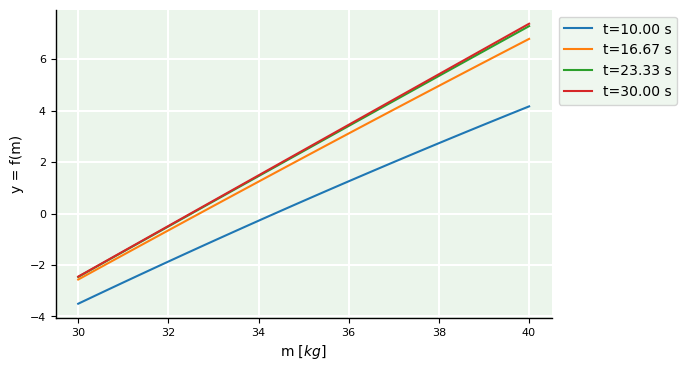

In [85]:
curves = []
for ti in np.linspace(10,30,4,dtype='float32'):
    line, = Parachute(30, 40, num=30, c=10, g=9.85, v=32, t=ti).plot(label=f't={ti:.2f} s')
    curves.append(line)
plt.legend(handles=curves,bbox_to_anchor=(1,1));

- Simulações para coeficiente de arrasto em 4 acelerações gravitacionais diferentes:
    - Qual é a característica das atmosferas para eses casos?

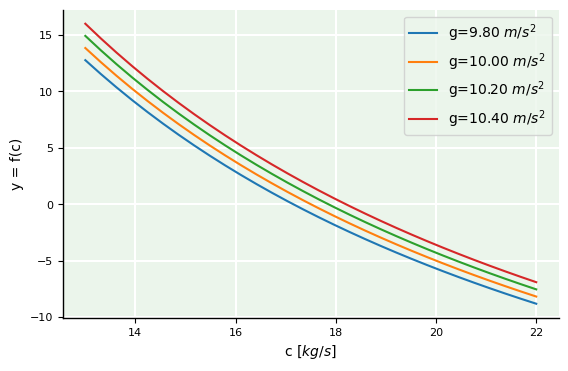

In [86]:
curves = []
for gi in np.linspace(9.8,10.4,4,dtype='float32'):
    line, = Parachute(13, 22, num=30, m=70, g=gi, t=60, v=40).plot(label=f'g={gi:.2f} $m/s^2$')
    curves.append(line)
plt.legend(handles=curves,bbox_to_anchor=(1.,1));

In [87]:
plt.rcdefaults()